#  BEMM461 Project - Unveiling Patterns in Urban Mobility Demand Based on Bike Vista

## Introduction
This project provides a platform to showcase skills in data visualization, statistical analysis and dashboard creation using the Dash Python framework. The autonomy granted in defining the project scope enables a tailored approach to align with the specific objectives. In this project, we are going to utilize the bike sharing demand dataset stems from its direct relevance to the project's focus on urban mobility. The bike sharing demand dataset is a collection of data containing hourly and daily bike rental counts for a bike-sharing system in Washington D.C., USA. This autonomy allows for a more personalized exploration of facets such as time series analysis, user behavior, or environmental factors affecting bike usage. The project's flexibility empowers to address key aspects that resonate with professional aspirations fostering a dynamic and purposeful engagement with the bike sharing demand dataset. 

## Table of Links
### Table
| Description | Link |
| -- | -- |
| Reflective blog | https://ele.exeter.ac.uk/mod/oublog/view.php?id=2698275|
| Chosen Dataset | https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset |

## Table of Contents
1. Executive Summary
2. Project Dashboard
3. Background to the Project
4. Articulation of Decision Making Process
5. Review of Analytics Methods Chosen
6. Review of Available Tools
7. Review of Chosen Datasets 
8. Visualisation of Data with Accompanying Code
9. Reflective Evaluation
10. Conclusion

## 1. Executive Summary

The bike sharing demand dataset is a collection of data containing hourly and daily bike rental counts for a 
bike-sharing system in Washington D.C., USA(we are only using hourly bike rental counts). The data is recorded between January 1st, 2011 and December 31st, 2012. The dataset contains a total of 17,379 records with 16 input features and 1 target feature. The input features include various environmental and temporal variables such as season, weather, temperature, humidity, wind speed, hour of the day and day of the week (Sathishkumar et al., 2020). The target feature is the total count of bike rentals which is the sum of the number of casual users and registered users. It serves as an example dataset for analysis of product demand. The dataset contains information on the number of bike rentals based on various factors such as time, weather conditions and holidays (Sathishkumar et al., 2020). Our goal is to create a dashboard and understand the patterns, optimizing inventory, predicting demand, and improving overall business efficiency. So, we will be creating a dashboard to visualize the count of bikes shared under 5 circumstance, during weekdays and weekends, during different weathers, during different seasons, during different months and different days.


## 2. Project Dashboard


The main aim of creating a dashboard is to translate organizational strategy into objectives, metrics, initiatives, and tasks, empowering users to enhance their decision-making capabilities. We need to understand the expectation of the CMO, they mainly would want to leverage audience segmentation by analyzing customer demographics to gauge the effectiveness of marketing efforts on distinct customer groups.

In [45]:
# importing the required libraries to be used in the project
import pandas as pd
import numpy as np
import plotly.express as px
from dash import Dash, dcc, html
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from dash.dependencies import Input, Output
from plotly.subplots import make_subplots 
import plotly.graph_objects as go 
import seaborn as sns

Having installed the libraries we need, loading the csv file and have a quick look at the data by 
using pd.read_csv( ).

In [46]:
# loading the data as a pandas dataframe
hour_data = pd.read_csv("hour.csv")

The code checks for null values in each column of the DataFrame hour_data and returns the count 
of null values for each column using hour_data.isnull().sum()

In [47]:
# checking for null values:
hour_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We can see, there is no missing data in the dataset.

Exploratory data analysis also known as EDA is a method used in statistics for evaluating data sets to summarize the most important aspects of the data (El-Assi et al., 2017). This method frequently makes use of statistical graphics and other methods for data visualization. EDA can be used with or without a statistical model but its primary purpose is to find out what the data might tell us that goes beyond the formal modeling and as a result contrasts with the testing of traditional hypotheses (Xu et al., 2018). With the help of EDA it is possible to figure out many elements of the target and the interactions between it and the independent variables.

Renaming some columns in the DataFrame for better readability. Data quality is paramount for credible 
visualizations and analyses, as poor quality can yield inaccurate insights and lead to misguided decisions.

In [48]:
# renaming some of the columns to complete names instead of abbreviations
hour_data = hour_data.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})

There are mainly 4 types of Dashboard, 1) Strategic ; 2) Tactical ; 3) Operational ; 4) Analytical.
We will be working on tht Tactical Dashboard as we will be monitoring and analyzing when and where the bike sharing are increasing or decreasing and how are the objectives performing. 

The provided code initializes a Dash web application with a layout containing a title, a dropdown menu 
for selecting different bike-sharing plots, and a graph container. 

In [49]:
# Initialize the Dash app
app = Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Bike Sharing Dashboard"),

    # Dropdown for user interaction
    dcc.Dropdown(
        id='plot-selector',
        options=[
            {'label': 'Count of bikes during weekdays and weekends', 'value': 'weekday_vs_weekend'},
            {'label': 'Count of bikes during different weathers', 'value': 'bikes_by_weather'},
            {'label': 'Count of bikes during different seasons', 'value': 'bikes_by_season'},
            {'label': 'Count of bikes during different months', 'value': 'bikes_by_month'},
            {'label': 'Count of bikes during different days', 'value': 'bikes_by_day'},
         
        ],
        value='weekday_vs_weekend',
        style={'width': '50%'}
    ),
    
    # Graph container
    dcc.Graph(id='plot-output')
])

The provided code defines a Dash callback function, update_graph, which dynamically updates the graph based on the user's selection from the dropdown menu. Depending on the selected plot option, it generates line plots for count of bikes during weekdays and weekends, different weathers, and different seasons and bar graph for bikes by month and bikes by day.

In [50]:

# Callback to update the graph based on user selection
@app.callback(
    Output('plot-output', 'figure'),
    [Input('plot-selector', 'value')]
)
def update_graph(selected_plot):
    # Logic to generate the selected plot
        # Logic to generate the selected plot
    if selected_plot == 'weekday_vs_weekend':
        # Aggregate counts for weekdays and weekends separately
        weekdays_data = hour_data[hour_data['weekday'] < 6].groupby(['hour', 'weekday'])['count'].sum().reset_index()
        weekends_data = hour_data[hour_data['weekday'] >= 6].groupby(['hour', 'weekday'])['count'].sum().reset_index()

        # Create line plots for weekdays and weekends
        fig = px.line(weekdays_data, x='hour', y='count', color='weekday',
                      labels={'count': 'Count of bikes', 'hour': 'Hour'})
        fig.add_trace(px.line(weekends_data, x='hour', y='count', color='weekday').data[0])

        fig.update_layout(title='Count of bikes during weekdays and weekends')

    elif selected_plot == 'bikes_by_weather':
        # Summing the count of bikes for all weather conditions at each hour
        weather_counts = hour_data.groupby(['hour', 'weather'])['count'].sum().reset_index()

        fig = px.line(weather_counts, x='hour', y='count', color='weather',
                      labels={'count': 'Count of bikes', 'hour': 'Hour', 'weather': 'Weather'})
        fig.update_layout(title='Count of bikes during different weathers')
        
    elif selected_plot == 'bikes_by_season':
        # Create a line plot for count of bikes during different seasons
        seasons = hour_data['season'].unique()
        fig = go.Figure()

        for season in seasons:
            season_data = hour_data[hour_data['season'] == season]
            season_counts = season_data.groupby('hour')['count'].sum().reset_index()
            fig.add_trace(go.Scatter(x=season_counts['hour'], y=season_counts['count'],
                                     mode='lines', name=f'Season {season}'))

        fig.update_layout(title='Total Count of bikes during different seasons',
                          xaxis=dict(title='Hour'),
                          yaxis=dict(title='Count of bikes'))

        fig.update_layout(title='Count of bikes during different seasons')
    elif selected_plot == 'bikes_by_month':
        fig = px.bar(hour_data, x='month', y='count',
                     labels={'count': 'Count of bikes', 'month': 'Month'})
        fig.update_layout(title='Count of bikes during different months')
    elif selected_plot == 'bikes_by_day':
        fig = px.bar(hour_data, x='weekday', y='count',
                     labels={'count': 'Count of bikes', 'weekday': 'Day of the Week'})
        fig.update_layout(title='Count of bikes during different days')

    
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8088)

Dash app running on http://127.0.0.1:8088/

## 3. Background to the Project

The design choices for the dashboard center on optimizing user experience and extracting meaningful insights from the bike sharing demand dataset. To enhance clarity and engagement opted for the Plotly library ensuring dynamic and interactive visualizations. The dashboard employs a user-friendly layout with intuitive navigation facilitating seamless exploration of diverse facets within the data (Gitzel et al., 2015). Color coding and contrasting elements aid in information hierarchy making it accessible to users with varying levels of familiarity with bike-sharing demand analytics. The inclusion of a dropdown menu allows users to choose specific visualizations tailoring their exploration based on individual interests or analytical objectives (Orlovskyi & Kopp, 2020).

1) Count of bikes during weekdays and weekends :
This plot provides valuable patterns of bike rental demand during weekdays and weekends at a 5 hour interval.
2) Count of bikes during different weathers : 
This plot provides valuable insights into the relationship between weather conditions and bike rental demand which can be useful for bike sharing system operators to optimize their inventory management and marketing strategies based on weather forecasts.
3) Count of bikes during different seasons :
This plot provides the relationship between seasons and bike rental demand
4) Count of bikes during different months :
The plot provides valuable insights into the seasonal trends of bike rental demand throughout the year which can be useful for bike sharing system operators to optimize their inventory management and marketing strategies based on monthly trends.
5) Count of bikes during different days :
The plot provides insights into the daily trends of bike rental demand throughout the week, which can be useful for bike sharing system operators to optimize their inventory management and staffing strategies based on daily trends.

 These design choices ensure flexibility accommodating the diverse needs of stakeholders ranging from urban planners to bike-sharing operators (Gitzel et al., 2015). The dashboard incorporates features like trend lines, hover tooltips and responsive axes offering a deeper layer of analytical granularity. This enables users to perform tasks such as identifying peak usage hours, understanding seasonal demand fluctuations and discerning the impact of weather conditions on bike sharing patterns. 




## 4. Articulation of Decision Making Process

In bike sharing demand the domain situation revolves around urban mobility and the utilization of 
shared bikes as a sustainable transportation solution. Cities worldwide implement bike sharing 
programs to address traffic congestion, reduce carbon emissions and promote healthier commuting options
(Noussan et al., 2019). The dataset chosen for analysis encapsulates temporal and environmental aspects
offering a holistic view of the factors influencing bike usage. Users engaging with the bike sharing demand
visualization are expected to perform several tasks to extract meaningful insights. Users can explore variations in bike usage discerning peak hours and understanding how demand fluctuates 
on weekdays versus weekends. Users may also investigate the impact of weather conditions on bike sharing 
 unveiling patterns that correlate with different atmospheric states (Noussan et al., 2019). Users can 
assess seasonal trends discerning how bike usage evolves across distinct seasons. The visualization empower
users to identify monthly patterns and potentially correlate these with external factors like weather 
promoting a deeper understanding of the dynamics shaping bike demand (Orlovskyi & Kopp, 2020). 





## 5. Review of Analytics Methods Chosen

Visualization is not something that happens on a page or on a screen; it happens in the mind.”  Robert Spence quoted in Alberto Cairo’s ‘The Functional Art (2011)

Before constructing the dashboard, clarify project objectives: analyze bike-sharing data trends, design an intuitive interface with a dropdown for insightful and interactive plots, enhancing user exploration and understanding.

### Norman’s 7 Stages of Action ###
Linked to 7 Questions:
1. What do I want to accomplish?
Our aim here is to create a dashboard ashboard and understand the patterns, optimizing inventory, predicting demand, and improving overall business efficiency.
2. What are the alternative action sequences?
Explore different data visualization techniques and implement various predictive models
3. What action can I take now?
Initiate dashboard development with a focus on visualizing key bike-sharing metrics.
4. How do I do it?
Utilize Python libraries (e.g., Dash, Pandas) to build interactive visualizations.
5. What happened?
Gain insights into bike-sharing patterns, predict demand, and optimize inventory.
6. What does it mean?
Identify operational trends, improve resource allocation, and enhance decision-making.
7. Is it ok? Have I accomplished my goal?
We need to go throught thr graph to make sure all the necessary requirement that we had in our mind are met by our output.

When interpreting and interrogating a visualisation, our brains execute a visual query.

Computational Kindness : According to computation kindess we should aim to minimize the amount of mental processing required by our audience to enhance the efficiency and effectiveness.

For example: The datasets are vast here, we can represent the data for all the bikes for each season in a single graph, that is possible too. But we are not attempting that way becasuse we need to minimize the clumsiness in the graph and also not the let the audience get confused by the visivalization. Hence we have taken the total count of bike for a particular season and demonstrated that in the graph. This will be easy for the audience to interpret the visualization.


Tufte's principle:

Enhance the Data Ink - It is necessary to balance the utility and the aesthetics of any visiualization at the same time. By emphasising the most important data ink, it will be appealing and attractive for the audience to visulaize the graph and also using colors we can easily understand and identify what the graph or the chart is trying to convey. In our current dashboard in the line graph we have used differentiated each season, each weather , weekends and weekdays with different color by increasing the data ink helping the audience to get the better insights of the graphs. At the same time subract and avoid the unnecessary data inks.



## 6. Review of Available Tools

In the context of the bike sharing demand dataset, the choice between Tableau and Power BI becomes crucial for the successful execution of the project goals. Given the dataset's diverse set of temporal and environmental variables, such as season, weather, temperature, humidity, wind speed, hour of the day, and day of the week, the need for a powerful and flexible visualization tool is evident.

Tableau's strength in creating interactive dashboards with diverse visualizations aligns well with the multifaceted nature of the bike-sharing dataset. Its ability to handle various data sources and provide real-time updates makes it suitable for analyzing hourly and daily rental counts. However, considerations must be made regarding licensing costs, particularly for smaller businesses.

On the other hand, Power BI, with its seamless integration with Microsoft technologies, might be advantageous for organizations already within the Microsoft ecosystem. Its data transformation capabilities, especially with Power Query, could facilitate a smoother analysis of the dataset. Additionally, cost-effectiveness could be a determining factor, especially for businesses with budget constraints.

Ultimately, the selected tool, whether Tableau or Power BI, should empower the creation of a comprehensive dashboard. This dashboard aims to uncover patterns, optimize inventory, predict demand, and enhance overall business efficiency by leveraging insights from the bike-sharing dataset. The choice of the visualization tool is pivotal in extracting actionable intelligence from the dataset, contributing to strategic decision-making in the bike rental business.


## 7. Review of Chosen Datasets 

The dataset was taken from https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset.
The choice to utilize the bike sharing demand dataset stems from its direct relevance to the project's 
focus on urban mobility. This dataset encapsulates intricate details about bike usage patterns encompassing
factors such as time, weather conditions and user characteristics (Sachdeva & Sarvanan, 2017). 
Leveraging this dataset the project gains a nuanced understanding of commuting dynamics and the influence of 
external variables on bike sharing demand. The decision is further motivated by the dataset's potential to
uncover insights into user behaviors facilitating a comprehensive exploration of the urban mobility 
landscape (Sachdeva & Sarvanan, 2017). The specificity and richness of the bike sharing data align with the
project's objectives making it an ideal choice for robust analysis and the development of a meaningful 
data-driven dashboard using the Dash Python framework.

## 8. Visualisation of Data with Accompanying Code
 

### PURPOSE ###
Purpose of choosing this graph is because, analyzing bike rentals on weekdays vs. weekends is crucial for optimizing resource allocation, tailoring marketing strategies, and maximizing revenue by understanding and adapting to distinct demand patterns during different days of the week.

The code below shows the count of bikes during weekdays and weekends for at an 5 hour interval of the day.

This Python code utilizes matplotlib and seaborn to create a point plot illustrating the total count of bikes each week based on hourly data. The hour_data DataFrame is grouped by 'hour' and 'weekday', and the sum of bike counts is calculated. The resulting plot is customized with a title, axis labels, and specific tick intervals for better readability, providing insights into bike rental patterns throughout the week.

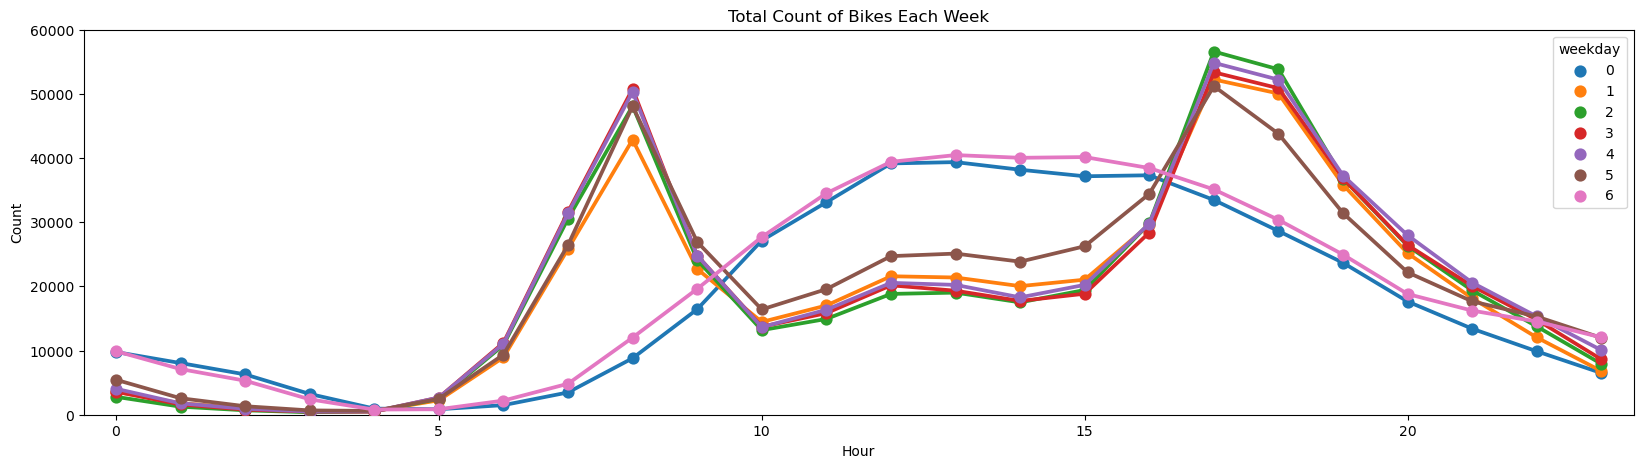

In [43]:
weekly_counts = hour_data.groupby(['hour', 'weekday'])['count'].sum().reset_index()

# Set up the plot
fig, ax = plt.subplots(figsize=(20, 5))
sns.pointplot(data=weekly_counts, x='hour', y='count', hue='weekday', ax=ax)
ax.set(title='Total Count of Bikes Each Week', xlabel='Hour', ylabel='Count', ylim=(0, 60000))
ax.set_xticks(range(0, 24, 5))  # Set x-axis interval to a 5-hour gap
ax.set_yticks(range(0, 60001, 10000))  # Set y-axis interval to 0-10k, 10k-20k, ..., 50k-60k

# Display the plot
plt.show()

### INSIGHTS ###
The figure above shows the count of bikes during weekdays and weekends for an interval gap of 5 hour. The hue parameter is set to weekday which means that the plot will display two separate lines, one for weekdays and one for weekends and the data points will be colored differently for each category. The resulting plot shows that the count of bikes is generally higher during weekdays than on weekends particularly during the rush hour periods in the morning around 8:00 and in the evening around 17:00 to 18:00. On weekdays, the bike 
rental count peaks at around 17:00, while on weekends, the peak occurs in the afternoon around 12:00 to 16:00. 
The plot also shows that there is more variability in the bike rental counts on weekends than on weekdays 
(El-Assi et al., 2017). This plot provides valuable insights into the hourly patterns of bike rental demand 
during weekdays and weekends which can be useful for bike sharing system operators to optimize their operations
and improve the user experience.

### Purpose ###

Examining the count of bikes during different seasons is vital for businesses to adapt to seasonal demand fluctuations, optimize inventory management, and tailor marketing strategies, ensuring effective resource allocation and strategic decision-making in response to varying customer preferences and environmental conditions.

This plot shows the Count of bikes during different Seasons. Plot will display separate lines for each of the four seasons present in the data: 1 - spring, 2 - summer, 3 - fall, 4 - winter

The hour_data DataFrame is grouped by 'hour' and 'season', and the sum of bike counts is calculated. The resulting plot is configured with a title, axis labels, and specific tick intervals for both the x-axis (hours) and y-axis (bike count), offering insights into bike rental patterns across different seasons.

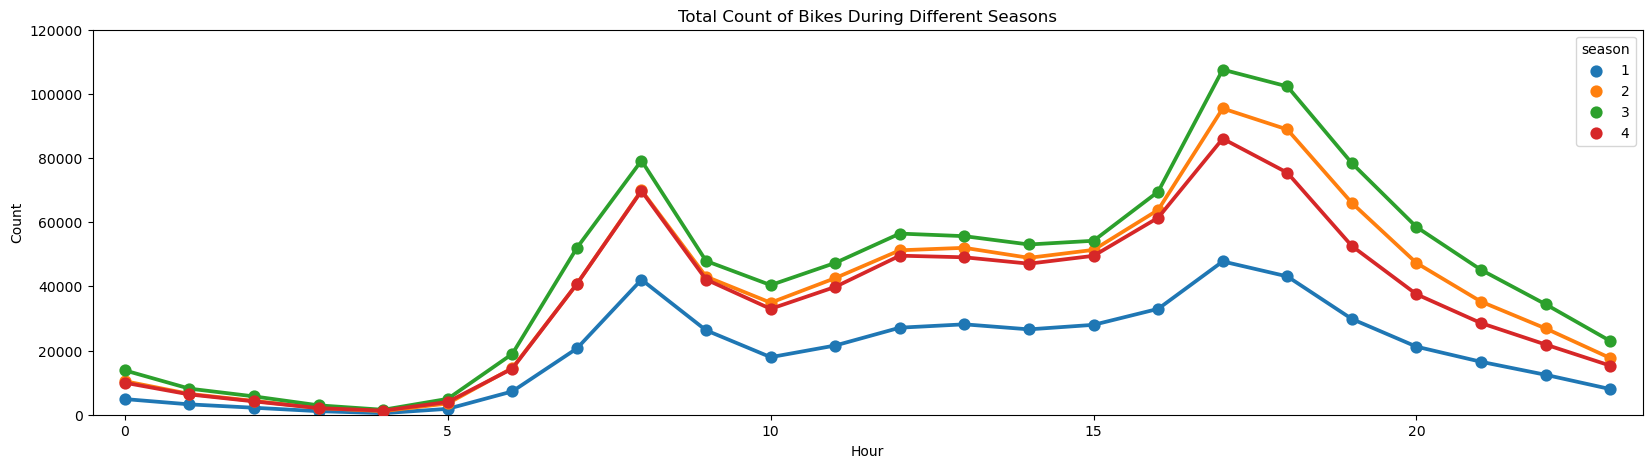

In [44]:
seasonal_counts = hour_data.groupby(['hour', 'season'])['count'].sum().reset_index()

# Set up the plot
fig, ax = plt.subplots(figsize=(20, 5))
sns.pointplot(data=seasonal_counts, x='hour', y='count', hue='season', ax=ax)
ax.set(title='Total Count of Bikes During Different Seasons', xlabel='Hour', ylabel='Count', ylim=(0, 120000))
ax.set_xticks(range(0, 24, 5))  # Set x-axis interval to a 5-hour gap
ax.set_yticks([0, 20000, 40000, 60000, 80000, 100000, 120000])  # Set y-axis intervals

# Display the plot
plt.show()

### INSIGHTS ###
The hue parameter is set to season which means that the plot will display separate lines for each of the four
seasons present in the data: 1 - spring, 2 - summer, 3 - fall, 4 - winter. The resulting plot shows that bike
rental counts are generally highest during the summer season, with a peak of around 200 bike rentals per hour in the late afternoon. The counts are lower during spring and fall seasons with a peak of around 150 bike rentals per hour in the late afternoon. The lowest counts are observed during the winter season with a peak of around 50 bike rentals per hour in the late morning. This plot provides valuable insights into the relationship between seasons and bike rental demand which can be useful for bike sharing system operators to optimize their inventory management and marketing strategies based on seasonal trends (Hampshire & Marla, 2012).

## 9. Reflective Evaluation

We started the project by collecting an appropriate datasets. As we know, data are the foundation for any analytics and visualization effort. A poor quality data will lead to a incorrect, flawed and unreliable decision. The reliability and value of any visualization or analytical project are greatly dependent on the quality of the data. The evaluation plan for this project encompasses multiple facets to ensure its effectiveness and user satisfaction. User testing will be instrumental in gauging the dashboard's usability and identifying potential pain points. A diverse group of stakeholders including urban planners, data analysts, and bike-sharing operators will engage with the dashboard to assess its functionality and relevance to their respective roles. Feedback collection mechanisms such as surveys and interviews will be employed to gather qualitative insights into user experiences, preferences and suggestions for improvement (Burns et al., 2020). 

Quantitative metrics including interaction frequencies, time spent on the dashboard and task completion rates will be analyzed to measure user engagement and efficiency. Continuous iteration based on user feedback and evolving data needs will be prioritized to enhance the dashboard's utility (Burns et al., 2020).

While working on this project we came across alot of challenges and learnt to overcome it. Now we know the importance and benefits of a dashboard. While knowing about dashboard we also came across Executive Information System (EIS), which is designed to concentrate on critical information, emphasizing what matters most to executives. It excels in identifying and presenting trends, issues, and anomalies within data, providing top-level decision-makers with key insights for strategic decision-making. EIS streamlines complex data into actionable and relevant information for effective executive-level analysis. While working on this we also came to get insights on some failing dashboards. The challenges with failing dashboards include a lack of alignment with the organization's strategy, inappropriate visual displays leading to confusion, and the use of excessive decorative elements without substantive value. Additionally, issues arise from inadequate summary indicators, excessive detail, overreliance on Excel with plugins, insufficient analytical capabilities, manual data updating leading to staleness, and business analysts spending disproportionate time on data collection rather than analysis. Furthermore, relying on a single data source and offering a narrow view underscores the importance of triangulating data from various sources for a more comprehensive understanding.

 This evaluation process aims not only to validate the effectiveness of the current visualization but also to inform iterative enhancements ensuring its continued relevance and usability in the dynamic context of urban mobility analysis.



## 10. Conclusion
Visualizing the bike sharing demand dataset has yielded valuable insights into urban mobility patterns. Analysis of hourly usage patterns revealed distinct peaks during commuting hours, aiding in the optimization
of bike-sharing infrastructure. The exploration of monthly trends showcased seasonality allowing for targeted 
strategies in resource allocation. Weather conditions emerged as a crucial determinant influencing bike demand 
across different atmospheric states.The project has been successful in meeting its objectives by delivering a user-centric dashboard that empowers stakeholders with actionable insights. The chosen design and interactivity options enable users to perform diverse tasks from identifying usage peaks to understanding the complex interplay between environmental factors and bike demand. The alignment with the Dash Python framework facilitated seamless integration and enhanced user accessibility. Reflecting on the project's success the dashboard emerges as a powerful tool for urban planners, policymakers and bike-sharing operators contributing to informed decision-making and sustainable urban mobility strategies. The comprehensive analysis and visualization of the bike sharing demand dataset affirm the project's efficacy in uncovering intricate patterns crucial for shaping the future of urban transportation.

## References

Sathishkumar, V. E., Park, J., & Cho, Y. (2020). Using data mining techniques for bike sharing 
demand prediction in metropolitan city. Computer Communications, 153, 353-366.

El-Assi, W., Salah Mahmoud, M., & Nurul Habib, K. (2017). Effects of built environment and weather
 on bike sharing demand: a station level analysis of commercial bike sharing in Toronto. 
 Transportation, 44, 589-613.

 Xu, C., Ji, J., & Liu, P. (2018). The station-free sharing bike demand forecasting with a deep learning 
 approach and large-scale datasets. Transportation research part C: emerging technologies, 95, 47-60

 Thu, N. T. H., Dung, C. T. P., Linh-Trung, N., & Le, H. V. (2017, October). Multi-source data analysis for 
 bike sharing systems. In 2017 International Conference on Advanced Technologies for Communications (ATC) (pp. 235-240). IEEE.

 Ramesh, A. A., Nagisetti, S. P., Sridhar, N., Avery, K., & Bein, D. (2021, January). Station-level demand 
 prediction for bike-sharing system. In 2021 IEEE 11th Annual Computing and Communication Workshop and
  Conference (CCWC) (pp. 0916-0921). IEEE.

  Hampshire, R. C., & Marla, L. (2012). An analysis of bike sharing usage: Explaining trip generation and
   attraction from observed demand. In 91st Annual meeting of the transportation research board, Washington, DC (pp. 12-2099).

Noussan, M., Carioni, G., Sanvito, F. D., & Colombo, E. (2019). Urban mobility demand profiles: Time series for cars and bike-sharing
 use as a resource for transport and energy modeling. Data, 4(3), 108.

 Lin, L., He, Z., & Peeta, S. (2018). Predicting station-level hourly demand in a large-scale bike-sharing network:
  A graph convolutional neural network approach. Transportation Research Part C: Emerging Technologies, 97, 258-276
 